--- 1. Running Plain Backtracking ---
Solution Found in 10.5018 seconds.
{'AP': 'Red', 'AR': 'Red', 'AS': 'Green', 'BR': 'Red', 'CG': 'Blue', 'GA': 'Red', 'GJ': 'Red', 'HR': 'Red', 'HP': 'Green', 'JH': 'Green', 'KA': 'Blue', 'KL': 'Red', 'MP': 'Green', 'MH': 'Yellow', 'MN': 'Red', 'ML': 'Red', 'MZ': 'Blue', 'NL': 'Blue', 'OD': 'Yellow', 'PB': 'Yellow', 'RJ': 'Blue', 'SK': 'Red', 'TN': 'Green', 'TS': 'Green', 'TR': 'Red', 'UP': 'Yellow', 'UK': 'Blue', 'WB': 'Blue', 'JK': 'Red'}
--------------------------------------------------

--- 2. Running Backtracking with MRV + LCV ---
Solution Found in 21.9843 seconds.
{'AP': 'Red', 'AR': 'Red', 'AS': 'Green', 'BR': 'Red', 'CG': 'Blue', 'GA': 'Red', 'GJ': 'Red', 'HR': 'Red', 'HP': 'Green', 'JH': 'Green', 'KA': 'Blue', 'KL': 'Red', 'MP': 'Green', 'MH': 'Yellow', 'MN': 'Red', 'ML': 'Red', 'MZ': 'Blue', 'NL': 'Blue', 'OD': 'Yellow', 'PB': 'Yellow', 'RJ': 'Blue', 'SK': 'Red', 'TN': 'Green', 'TS': 'Green', 'TR': 'Red', 'UP': 'Yellow', 'UK': 'Blue', 'W

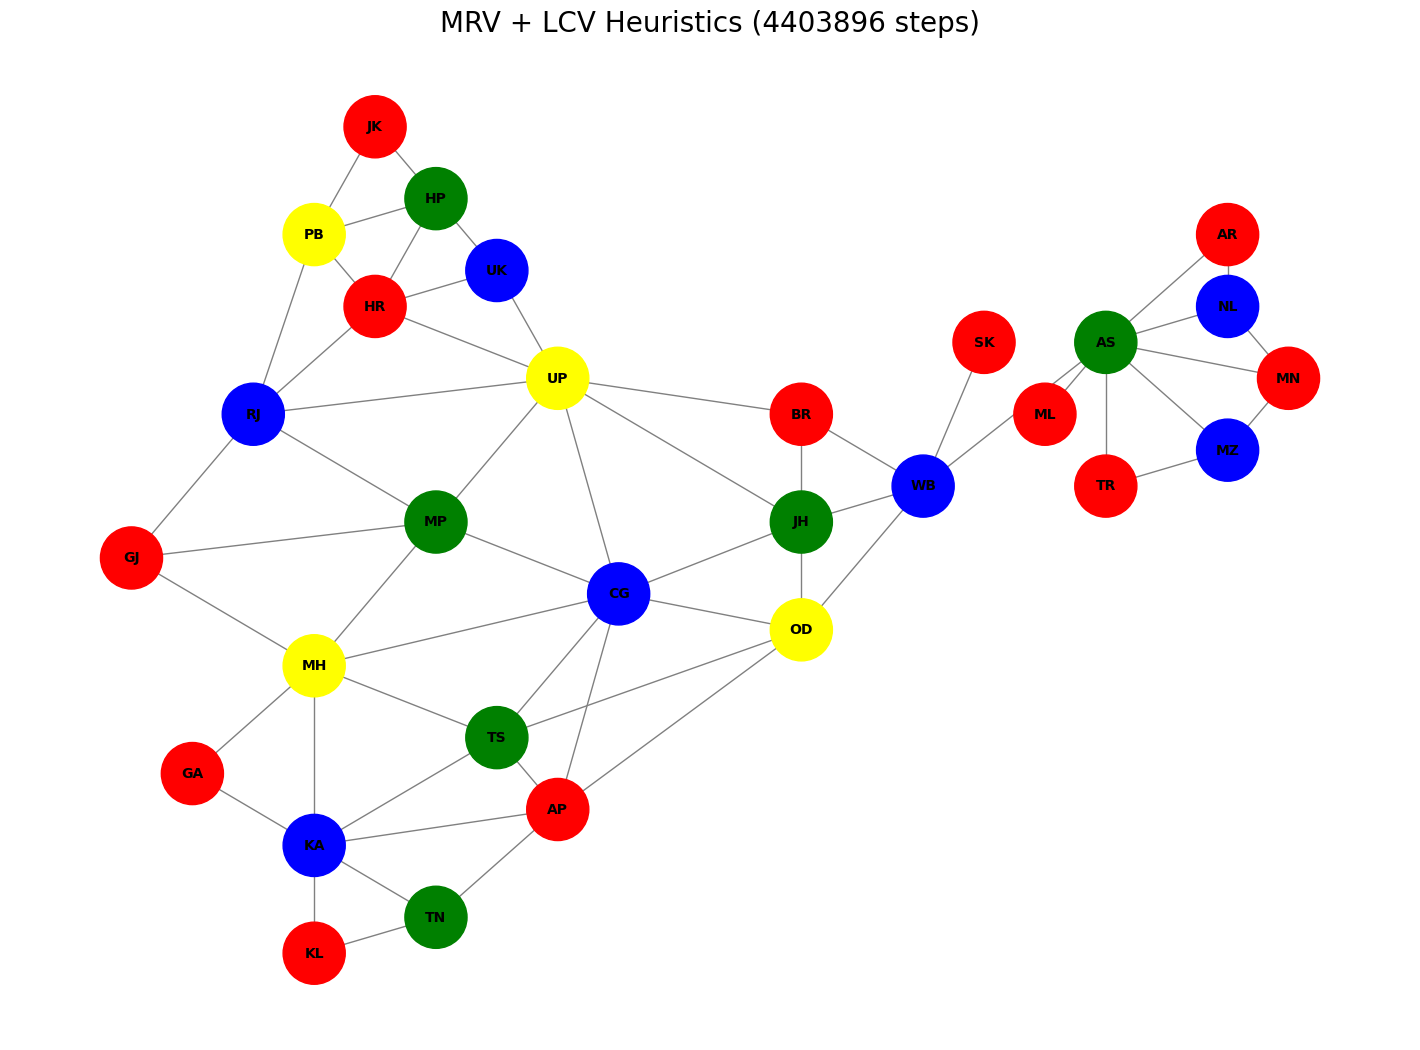

--------------------------------------------------

--- 3. Running Backtracking with MRV, LCV + AC-3 ---
Solution Found in 0.0083 seconds.
{'AP': 'Red', 'CG': 'Green', 'OD': 'Blue', 'TS': 'Yellow', 'JH': 'Red', 'KA': 'Green', 'MH': 'Red', 'GA': 'Blue', 'MP': 'Blue', 'UP': 'Yellow', 'BR': 'Blue', 'GJ': 'Yellow', 'RJ': 'Red', 'HR': 'Green', 'PB': 'Blue', 'HP': 'Yellow', 'TN': 'Blue', 'KL': 'Red', 'UK': 'Red', 'WB': 'Green', 'JK': 'Red', 'AS': 'Red', 'AR': 'Green', 'NL': 'Blue', 'MN': 'Green', 'MZ': 'Blue', 'TR': 'Green', 'ML': 'Green', 'SK': 'Red'}


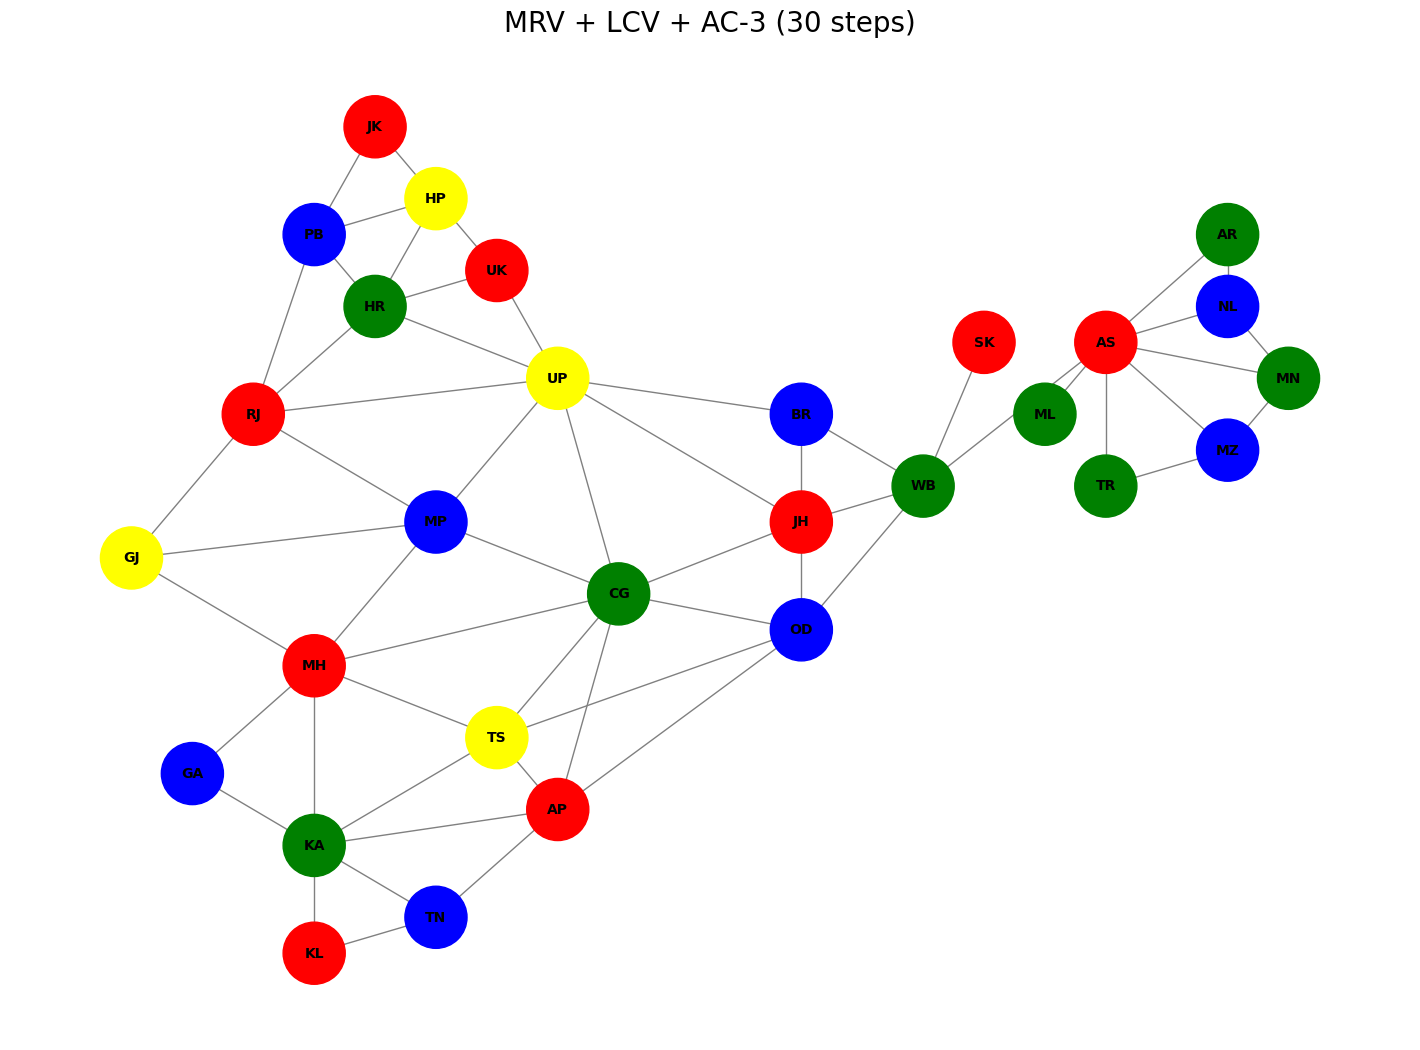

--------------------------------------------------

--- Comparison of Algorithms ---
+------------------------------------------------------------+
| Algorithm                      |  Steps Taken |   Time (sec) |
+------------------------------------------------------------+
| Plain Backtracking             |      4403896 |      10.5018 |
| Backtracking with MRV + LCV    |      4403896 |      21.9843 |
| Backtracking with MRV, LCV + AC-3 |           30 |       0.0083 |
+------------------------------------------------------------+


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import copy
import time

# --- Configuration ---
# Set to True to see the step-by-step decision process for heuristic algorithms.
# WARNING: This will significantly slow down the execution.
VERBOSE = False

# --- India Map Data ---
# Abbreviations for states and union territories
variables = [
    "AP", "AR", "AS", "BR", "CG", "GA", "GJ", "HR", "HP", "JH", "KA",
    "KL", "MP", "MH", "MN", "ML", "MZ", "NL", "OD", "PB", "RJ", "SK",
    "TN", "TS", "TR", "UP", "UK", "WB", "JK"
]

# Available colors for mapping
colors = ["Red", "Green", "Blue", "Yellow"]

# Adjacency list representing neighboring states
neighbors = {
    "AP": ["TS", "OD", "TN", "KA", "CG"],
    "AR": ["AS", "NL"],
    "AS": ["AR", "NL", "ML", "TR", "MZ", "MN", "WB"],
    "BR": ["UP", "JH", "WB"],
    "CG": ["UP", "JH", "OD", "MH", "MP", "AP", "TS"],
    "GA": ["MH", "KA"],
    "GJ": ["MH", "RJ", "MP"],
    "HR": ["PB", "HP", "UK", "RJ", "UP"],
    "HP": ["JK", "PB", "HR", "UK"],
    "JH": ["BR", "UP", "CG", "OD", "WB"],
    "KA": ["MH", "AP", "TS", "TN", "KL", "GA"],
    "KL": ["KA", "TN"],
    "MP": ["RJ", "UP", "CG", "MH", "GJ"],
    "MH": ["GJ", "MP", "CG", "TS", "KA", "GA"],
    "MN": ["AS", "MZ", "NL"],
    "ML": ["AS"],
    "MZ": ["AS", "MN", "TR"],
    "NL": ["AR", "AS", "MN"],
    "OD": ["WB", "JH", "CG", "AP", "TS"],
    "PB": ["JK", "HP", "HR", "RJ"],
    "RJ": ["PB", "HR", "MP", "GJ", "UP"],
    "SK": ["WB"],
    "TN": ["AP", "KA", "KL"],
    "TS": ["MH", "KA", "AP", "OD", "CG"],
    "TR": ["AS", "MZ"],
    "UP": ["UK", "HR", "RJ", "MP", "CG", "JH", "BR"],
    "UK": ["HP", "HR", "UP"],
    "WB": ["BR", "JH", "OD", "AS", "SK"],
    "JK": ["HP", "PB"]
}

# --- Utility Functions ---

def is_valid(assignment, var, value, neighbors):
    """Checks if assigning a color to a variable is consistent."""
    for n in neighbors[var]:
        if n in assignment and assignment[n] == value:
            return False
    return True

# --- Algorithm 1: Plain Backtracking ---

plain_steps = 0

def backtrack_plain(assignment):
    """Solves the problem using a simple backtracking search."""
    global plain_steps
    plain_steps += 1

    if len(assignment) == len(variables):
        return assignment

    var = [v for v in variables if v not in assignment][0]

    for value in colors:
        if is_valid(assignment, var, value, neighbors):
            assignment[var] = value
            result = backtrack_plain(assignment)
            if result:
                return result
            del assignment[var]
    return None

# --- Algorithm 2: Backtracking with MRV & LCV Heuristics ---

mrv_lcv_steps = 0

def select_unassigned_var_mrv(assignment, domains):
    """Selects the variable with the Minimum Remaining Values (MRV)."""
    unassigned = [v for v in variables if v not in assignment]
    return min(unassigned, key=lambda var: len(domains[var]))

def order_domain_values_lcv(var, assignment, domains):
    """Orders values by the Least Constraining Value (LCV) heuristic."""
    def conflicts(value):
        count = 0
        for neighbor in neighbors[var]:
            if neighbor not in assignment and value in domains[neighbor]:
                count += 1
        return count
    return sorted(domains[var], key=conflicts)

def backtrack_mrv_lcv(assignment, domains):
    """Solves the problem using backtracking with MRV and LCV heuristics."""
    global mrv_lcv_steps
    mrv_lcv_steps += 1

    if len(assignment) == len(variables):
        return assignment

    var = select_unassigned_var_mrv(assignment, domains)
    ordered_values = order_domain_values_lcv(var, assignment, domains)

    if VERBOSE:
        print(f"Step {mrv_lcv_steps} (MRV+LCV): Var={var}, Colors={ordered_values}")

    for value in ordered_values:
        if is_valid(assignment, var, value, neighbors):
            assignment[var] = value
            result = backtrack_mrv_lcv(assignment, domains)
            if result:
                return result
            del assignment[var]
    return None

# --- Algorithm 3: Backtracking with MRV, LCV + AC-3 ---

ac3_steps = 0

def revise(domains, xi, xj):
    revised = False
    for x_val in domains[xi][:]:
        if not any(x_val != y_val for y_val in domains[xj]):
            domains[xi].remove(x_val)
            revised = True
    return revised

def ac3(domains):
    queue = deque([(xi, xj) for xi in variables for xj in neighbors[xi]])
    while queue:
        (xi, xj) = queue.popleft()
        if revise(domains, xi, xj):
            if not domains[xi]:
                return False
            for xk in neighbors[xi]:
                if xk != xj:
                    queue.append((xk, xi))
    return True

def backtrack_ac3(assignment, domains):
    global ac3_steps
    ac3_steps += 1

    if len(assignment) == len(variables):
        return assignment

    var = select_unassigned_var_mrv(assignment, domains)
    ordered_values = order_domain_values_lcv(var, assignment, domains)

    if VERBOSE:
        print(f"Step {ac3_steps} (AC3): Var={var} (Domain: {len(domains[var])}), Colors={ordered_values}")

    for value in ordered_values:
        assignment[var] = value
        domains_copy = copy.deepcopy(domains)
        domains_copy[var] = [value]

        if ac3(domains_copy):
            result = backtrack_ac3(assignment, domains_copy)
            if result:
                return result

        del assignment[var]
    return None

# --- Visualization ---

def visualize_coloring(solution, title):
    if not solution:
        print(f"No solution found for: {title}")
        return

    G = nx.Graph()
    G.add_nodes_from(variables)
    for var, neighs in neighbors.items():
        for n in neighs:
            G.add_edge(var, n)

    pos = {
        'JK': (3, 10), 'HP': (3.5, 9), 'PB': (2.5, 8.5), 'UK': (4, 8), 'HR': (3, 7.5),
        'RJ': (2, 6), 'UP': (4.5, 6.5), 'BR': (6.5, 6), 'SK': (8, 7), 'AR': (10, 8.5),
        'NL': (10, 7.5), 'MN': (10.5, 6.5), 'MZ': (10, 5.5), 'TR': (9, 5), 'ML': (8.5, 6),
        'AS': (9, 7), 'WB': (7.5, 5), 'JH': (6.5, 4.5), 'OD': (6.5, 3), 'CG': (5, 3.5),
        'MP': (3.5, 4.5), 'GJ': (1, 4), 'MH': (2.5, 2.5), 'TS': (4, 1.5), 'AP': (4.5, 0.5),
        'GA': (1.5, 1), 'KA': (2.5, 0), 'TN': (3.5, -1), 'KL': (2.5, -1.5)
    }

    node_colors = [solution.get(node, "white") for node in G.nodes()]

    plt.figure(figsize=(14, 10))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=2000,
        font_size=10,
        font_weight="bold",
        edge_color="grey"
    )
    plt.title(title, fontsize=20)
    plt.show()

# --- Main Execution ---

if __name__ == "__main__":
    # --- Run Algorithm 1 ---
    print("--- 1. Running Plain Backtracking ---")
    start_time = time.time()
    plain_solution = backtrack_plain({})
    end_time = time.time()
    plain_time = end_time - start_time
    print(f"Solution Found in {plain_time:.4f} seconds.")
    print(plain_solution)
    # visualize_coloring(plain_solution, f"Plain Backtracking ({plain_steps} steps)")
    print("-" * 50)

    # --- Run Algorithm 2 ---
    print("\n--- 2. Running Backtracking with MRV + LCV ---")
    start_time = time.time()
    initial_domains_mrv = {var: list(colors) for var in variables}
    mrv_lcv_solution = backtrack_mrv_lcv({}, initial_domains_mrv)
    end_time = time.time()
    mrv_lcv_time = end_time - start_time
    print(f"Solution Found in {mrv_lcv_time:.4f} seconds.")
    print(mrv_lcv_solution)
    visualize_coloring(mrv_lcv_solution, f"MRV + LCV Heuristics ({mrv_lcv_steps} steps)")
    print("-" * 50)

    # --- Run Algorithm 3 ---
    print("\n--- 3. Running Backtracking with MRV, LCV + AC-3 ---")
    start_time = time.time()
    initial_domains_ac3 = {var: list(colors) for var in variables}
    ac3(initial_domains_ac3)
    ac3_solution = backtrack_ac3({}, initial_domains_ac3)
    end_time = time.time()
    ac3_time = end_time - start_time
    print(f"Solution Found in {ac3_time:.4f} seconds.")
    print(ac3_solution)
    visualize_coloring(ac3_solution, f"MRV + LCV + AC-3 ({ac3_steps} steps)")
    print("-" * 50)

    # --- Final Comparison ---
    print("\n--- Comparison of Algorithms ---")
    print("+" + "-"*60 + "+")
    print(f"| {'Algorithm':<30} | {'Steps Taken':>12} | {'Time (sec)':>12} |")
    print("+" + "-"*60 + "+")
    print(f"| {'Plain Backtracking':<30} | {plain_steps:>12} | {plain_time:>12.4f} |")
    print(f"| {'Backtracking with MRV + LCV':<30} | {mrv_lcv_steps:>12} | {mrv_lcv_time:>12.4f} |")
    print(f"| {'Backtracking with MRV, LCV + AC-3':<30} | {ac3_steps:>12} | {ac3_time:>12.4f} |")
    print("+" + "-"*60 + "+")